# 04_NonLinear_models_w_Activation

In [10]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)    # reproducible

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Experiment with Activation Function

In [5]:
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)
x_np = x.data.numpy()   # numpy array for plotting

In [11]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

# y_softmax = F.softmax(x)
# softmax is a special kind of activation function, it is about probability
# and will make the sum as 1.\

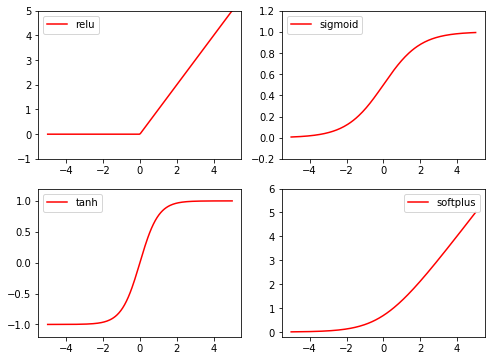

In [12]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

## NonLinear Regression Model (== Neural Network?!)

### Prepare Data

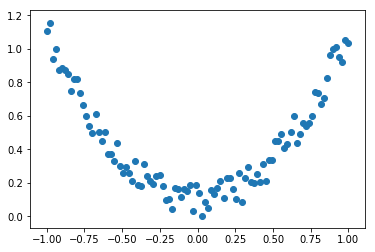

In [28]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### Define NonLinear Model

In [40]:
# Hypothesis using sigmoid and linear model
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

net = nn.Sequential(hidden, activation, output)

### Define Optimizer and Loss Function

In [41]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

### Train

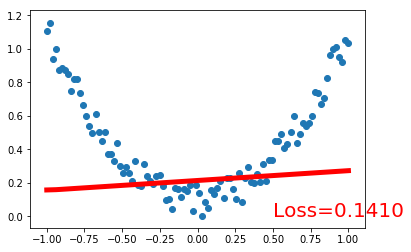

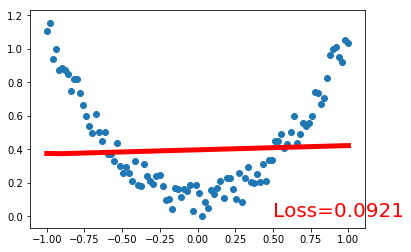

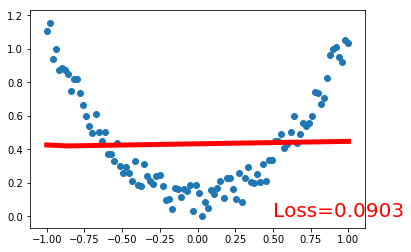

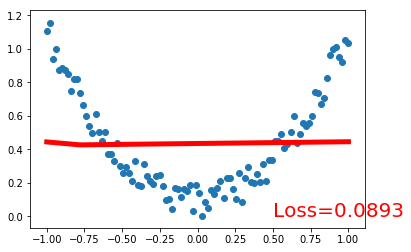

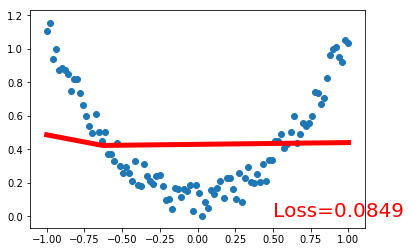

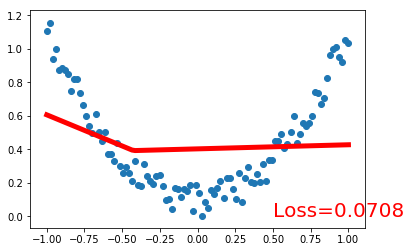

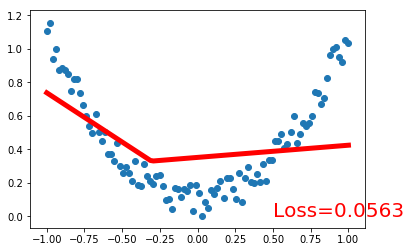

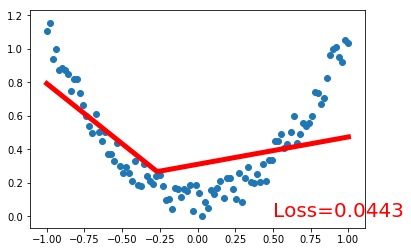

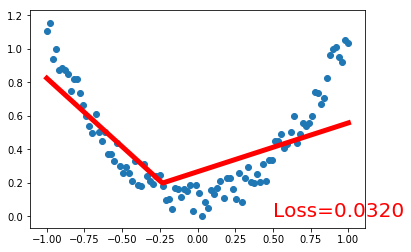

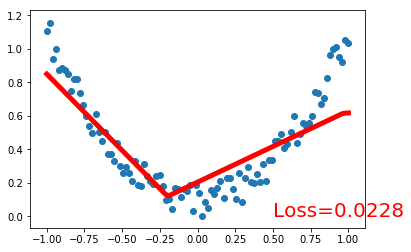

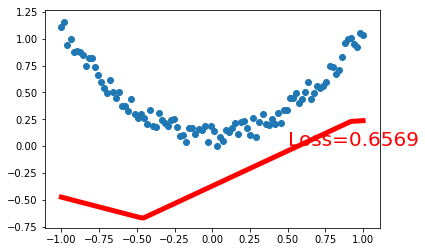

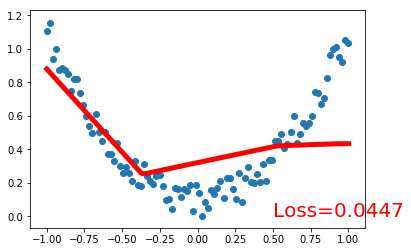

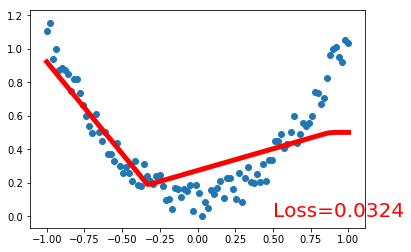

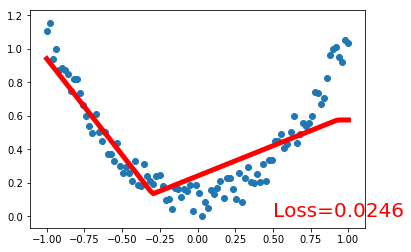

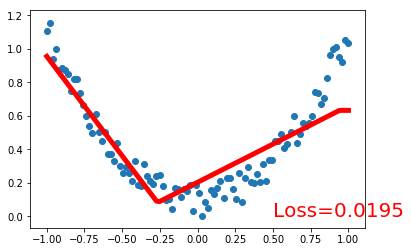

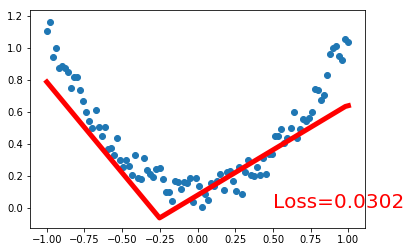

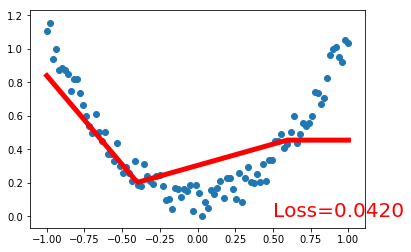

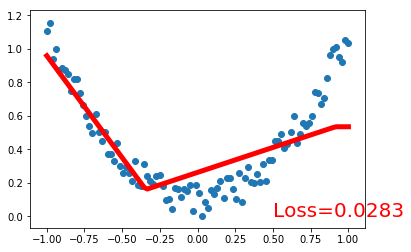

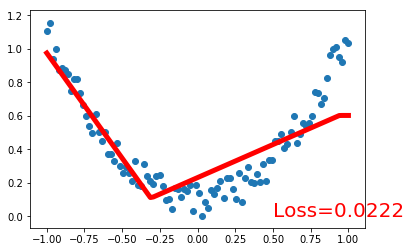

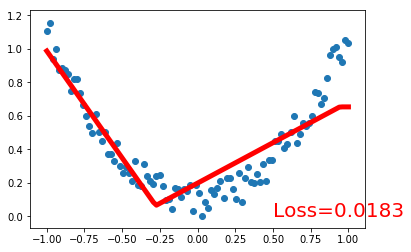

In [42]:
for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients


    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.2)

plt.ioff()

### Save and Load Model

In [138]:
torch.save(net.state_dict(), 'nonlinear.pkl')
net.state_dict()

OrderedDict([('0.weight', 
              -0.4010
               0.4960
               0.0644
               0.9696
               0.8758
              -0.5195
              -0.8725
               0.1239
              -0.6214
              -0.8383
              [torch.FloatTensor of size 10x1]), ('0.bias', 
              -0.8816
               0.1224
              -0.0953
              -0.0991
              -0.5469
              -0.5189
               0.7579
               0.1308
               0.4840
               0.3080
              [torch.FloatTensor of size 10]), ('2.weight', 
              -0.0638  0.2604  0.1361  0.1788  0.1560  0.3016 -0.1805 -0.0362  0.1005 -0.2270
              [torch.FloatTensor of size 1x10]), ('2.bias', 
               0.2896
              [torch.FloatTensor of size 1])])

In [139]:
net.load_state_dict(torch.load('nonlinear.pkl'))
net.state_dict()

OrderedDict([('0.weight', 
              -0.4010
               0.4960
               0.0644
               0.9696
               0.8758
              -0.5195
              -0.8725
               0.1239
              -0.6214
              -0.8383
              [torch.FloatTensor of size 10x1]), ('0.bias', 
              -0.8816
               0.1224
              -0.0953
              -0.0991
              -0.5469
              -0.5189
               0.7579
               0.1308
               0.4840
               0.3080
              [torch.FloatTensor of size 10]), ('2.weight', 
              -0.0638  0.2604  0.1361  0.1788  0.1560  0.3016 -0.1805 -0.0362  0.1005 -0.2270
              [torch.FloatTensor of size 1x10]), ('2.bias', 
               0.2896
              [torch.FloatTensor of size 1])])

### Save and Load Entire Model

In [ ]:
torach.save(net, 'net.pkl')
net=torch.load('net.plk')